# DIABETES PREDICTION USING PIMA DIABETES DATASET


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Pima_Indian_diabetes.csv")
print("Data dimension:",df.shape)
df.head()

Data dimension: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.600000,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.300000,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,19.179925,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.100000,2.288,33.0,1


In [3]:
print("Data points per class:\n")
df['Outcome'].value_counts()

Data points per class:



0    500
1    268
Name: Outcome, dtype: int64

## Overview of PIMA Diabetes Dataset



1. Number of data points : 768
   <br><br>
2. Number of features   : 8
   <br><br>
3. Features :
   <br><br>
 1. Pregnancies : Number of times pregnant

 2. Glucose : Plasma glucose concentration (2 hours in an oral glucose tolerance test)
                           
 3. BloodPressure : Diastolic blood pressure (mm Hg)
                           
 4. SkinThickness : Triceps skin fold thickness (mm) 
 
 5. Insulin : 2-Hour serum insulin (mu U/ml)
  
 6. BMI : Body mass index
 
 7. DiabetesPedigreeFunction - Diabetes pedigree function 
 
 8. Age : Age in years              
 <br><br>                          
4. Number of classes : 2

 1. class '1' = Patient tested positive for diabetes
                           
 2. class '0' = Patient tested negative for diabetes
  <br><br>                         
5. Data points per class :                           
                          
 1. class '1' : 268
                          
 2. class '0' : 500


## Data Preprocessing

### 1. Handling missing values

In [4]:
print("Number of data points with missing Pregnancies value : ",df.Pregnancies.isnull().sum())
print("Number of data points with missing Glucose value : ",df.Glucose.isnull().sum())
print("Number of data points with missing BloodPressure value : ",df.BloodPressure.isnull().sum())
print("Number of data points with missing SkinThickness value : ",df.SkinThickness.isnull().sum())
print("Number of data points with missing Insulin value : ",df.Insulin.isnull().sum())
print("Number of data points with missing BMI value : ",df.BMI.isnull().sum())
print("Number of data points with missing DiabetesPedigreeFunction value : ",df.DiabetesPedigreeFunction.isnull().sum())
print("Number of data points with missing Age value : ",df.Age.isnull().sum())
print("Number of data points with missing Outcome value : ",df.Outcome.isnull().sum())


Number of data points with missing Pregnancies value :  26
Number of data points with missing Glucose value :  16
Number of data points with missing BloodPressure value :  0
Number of data points with missing SkinThickness value :  22
Number of data points with missing Insulin value :  0
Number of data points with missing BMI value :  11
Number of data points with missing DiabetesPedigreeFunction value :  0
Number of data points with missing Age value :  19
Number of data points with missing Outcome value :  0


#### Observations :



1. Columns containing missing data points cannot be filled with mean values as columns contains values corresponding to different patients. It is absurd to infer the missing data of a patient from distribution of data belonging to other patients.
<br><br>
2. Since the number of datapoints with missing values are less so we can replace the rows with missing values by 0 

In [5]:
df.Pregnancies.fillna(value = 0, inplace = True)
df.Glucose.fillna(value = 0, inplace = True)
df.BloodPressure.fillna(value = 0, inplace = True)
df.SkinThickness.fillna(value = 0, inplace = True)
df.Insulin.fillna(value = 0, inplace = True)
df.BMI.fillna(value = 0, inplace = True)
df.DiabetesPedigreeFunction.fillna(value = 0, inplace = True)
df.Age.fillna(value = 0, inplace = True)

In [6]:
print("Number of data points with zero Pregnancies value : ",df[df.Pregnancies == 0].shape[0])
print("Number of data points with zero Glucose value : ",df[df.Glucose == 0].shape[0])
print("Number of data points with zero for BloodPressure value : ",df[df.BloodPressure == 0].shape[0])
print("Number of data points with zero SkinThickness value : ",df[df.SkinThickness == 0].shape[0])
print("Number of data points with zero Insulin value : ",df[df.Insulin == 0].shape[0])
print("Number of data points with zero BMI value : ",df[df.BMI == 0].shape[0])
print("Number of data points with zero DiabetesPedigreeFunction value : ",df[df.DiabetesPedigreeFunction == 0].shape[0])
print("Number of data points with zero Age value : ",df[df.Age == 0].shape[0])

Number of data points with zero Pregnancies value :  132
Number of data points with zero Glucose value :  21
Number of data points with zero for BloodPressure value :  32
Number of data points with zero SkinThickness value :  237
Number of data points with zero Insulin value :  374
Number of data points with zero BMI value :  21
Number of data points with zero DiabetesPedigreeFunction value :  0
Number of data points with zero Age value :  19


#### Observations :

1. Features SkinThickness and Insulin contains large number of zero values. Hence these two features can be ignored.
<br> <br>
2. Columns Glucose,BloodPressure,BMI,Age cannot contain zero values. Those parameters will be greater than zero for a patient. Thus rows containing zero value for those features can be eliminated.
<br><br>
3. Pregnancies feature can contain zero values and such rows are retained.
<br><br>
4. In the next step rows containing negative values for features Pregancies,Glucose,BloodPressure,BMI,Age are eliminated. Negative value for those parameters are not valid
<br><br>
5. Rows containing zero values for features Glucose,BloodPressure,BMI,Age are eliminated.

In [7]:
df=df[df["Pregnancies"]>=0]
df=df[df["Glucose"]>0]
df = df[df["BloodPressure"]>0]
df = df[df["BMI"]>0]
preprocDf = df[df["Age"]>0]
preprocDf = preprocDf.drop(["Insulin"],axis=1)
preprocDf = preprocDf.drop(["SkinThickness"],axis=1)
preprocDf.head()
preprocDf.shape

(676, 7)

In [8]:
print("Number of data points with zero Pregnancies value : ",preprocDf[preprocDf.Pregnancies == 0].shape[0])
print("Number of data points with zero GLucose value : ",preprocDf[preprocDf.Glucose == 0].shape[0])
print("Number of data points with zero for BloodPressure value : ",preprocDf[preprocDf.BloodPressure == 0].shape[0])
print("Number of data points with zero BMI value : ",preprocDf[preprocDf.BMI == 0].shape[0])
print("Number of data points with zero DiabetesPedigreeFunction value : ",preprocDf[preprocDf.DiabetesPedigreeFunction == 0].shape[0])
print("Number of data points with zero Age value : ",preprocDf[preprocDf.Age == 0].shape[0])

Number of data points with zero Pregnancies value :  113
Number of data points with zero GLucose value :  0
Number of data points with zero for BloodPressure value :  0
Number of data points with zero BMI value :  0
Number of data points with zero DiabetesPedigreeFunction value :  0
Number of data points with zero Age value :  0


## Exploratory Data Analysis

### Probability Density Function 

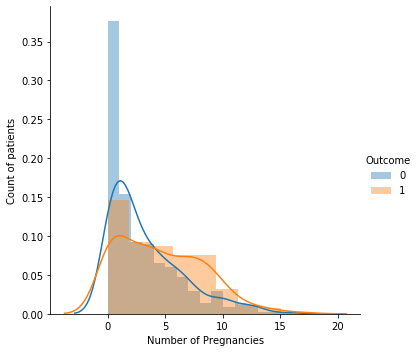

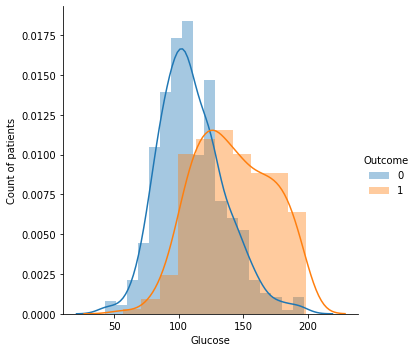

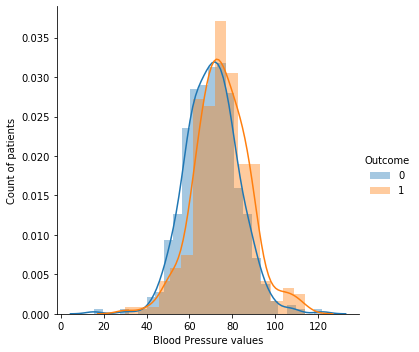

In [9]:
# Histograms

import warnings
warnings.filterwarnings("ignore")


# Histogram using Pregnancies feature

sns.FacetGrid(preprocDf,hue='Outcome',size=5) \
   .map(sns.distplot,'Pregnancies') \
   .add_legend();  
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count of patients')
plt.show();


# Histogram of Glucose feature

sns.FacetGrid(preprocDf,hue='Outcome',size=5) \
   .map(sns.distplot,'Glucose') \
   .add_legend();  
plt.xlabel('Glucose')
plt.ylabel('Count of patients')
plt.show();


# Histogram of BloodPressure feature

sns.FacetGrid(preprocDf,hue='Outcome',size=5) \
   .map(sns.distplot,'BloodPressure') \
   .add_legend();  
plt.xlabel('Blood Pressure values')
plt.ylabel('Count of patients')
plt.show();




#### Observations :

1. It can be inferred that patients tested positive for diabetes had higher level of glucose. Most of them had values greter than 130.
<br><br>
2. BloodPressure values of both the classes patient overlap highly, so it won't be a major feature for classification.
<br><br>
3. Among patient tested positive for diabetes most of them had number of pergnancies greater than 3.

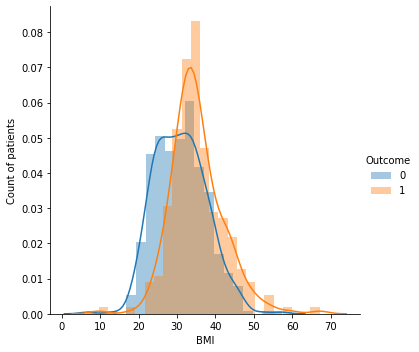

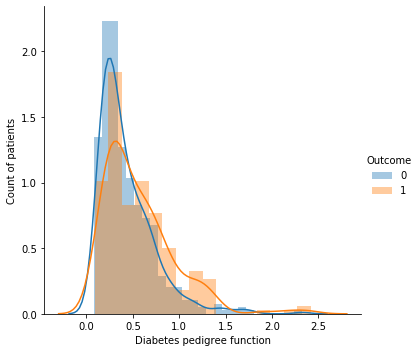

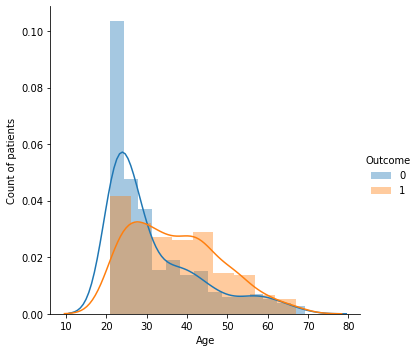

In [10]:
# Histogram of BMI feature

sns.FacetGrid(preprocDf,hue='Outcome',size=5) \
   .map(sns.distplot,'BMI') \
   .add_legend();  
plt.xlabel('BMI')
plt.ylabel('Count of patients')
plt.show()

# Histogram of Diabetes pedigree function feature

sns.FacetGrid(preprocDf,hue='Outcome',size=5) \
   .map(sns.distplot,'DiabetesPedigreeFunction') \
   .add_legend();  
plt.xlabel('Diabetes pedigree function')
plt.ylabel('Count of patients')
plt.show()

# Histogram of Age feature

sns.FacetGrid(preprocDf,hue='Outcome',size=5) \
   .map(sns.distplot,'Age') \
   .add_legend();  
plt.xlabel('Age')
plt.ylabel('Count of patients')
plt.show()


#### Observations :

1. Most of the patients with diabetes had BMI value greater than 30.
<br><br>
2. Among patient tested negative most of them had diabetes pedigree function value less than 0.5 and if it is greater than 0.5 chances of having diabetes is more.
<br><br>
3. Count of patients with diabetes was higher for age group greater than 30.

### Box Plots

1. Box plot can be used to get more insight about the spread of data.
<br><br>
2. It will show the 50th , 25th and 75th percentiles vlaues of a particular feature. The length of the box will give the interquartile range (75th - 25th percentile) 

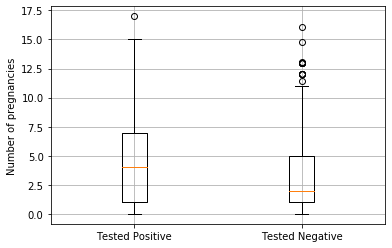

In [11]:
# Box plots 

positive_preg = preprocDf[preprocDf["Outcome"]==1]["Pregnancies"]
negative_preg = preprocDf[preprocDf["Outcome"]==0]["Pregnancies"]

plt.boxplot([positive_preg, negative_preg])
plt.xticks([1,2],('Tested Positive','Tested Negative'))
plt.ylabel('Number of pregnancies')
plt.grid()
plt.show()

#### Observations :

1. More than 50 percent of the patients tested positive for diabetes had atleast 3 pregnancies
<br><br>
2. 50 percent of patient tested negative had less than 2 pregnancies
<br><br>
3. It can be inferred that patient with more number of pregancies have higher chances of having diabetes

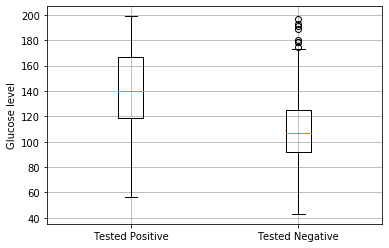

In [12]:
positive_glucose = preprocDf[preprocDf["Outcome"]==1]["Glucose"]
negative_glucose = preprocDf[preprocDf["Outcome"]==0]["Glucose"]

plt.boxplot([positive_glucose, negative_glucose])
plt.xticks([1,2],('Tested Positive','Tested Negative'))
plt.ylabel('Glucose level')
plt.grid()
plt.show()

#### Observations :

1. More than 70 percent of patients with diabetes had glucode level higher than 120
<br><br>
2. Among patients tested negative 70 percent of them had glucose level less than 120
<br><br>
3. It is highly likely that patient has diabetes if his glucose level is more than 120

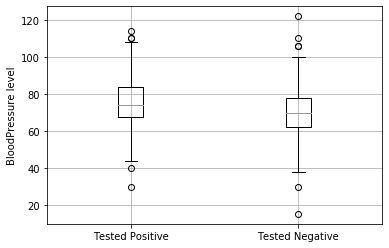

In [13]:
positive_glucose = preprocDf[preprocDf["Outcome"]==1]["BloodPressure"]
negative_glucose = preprocDf[preprocDf["Outcome"]==0]["BloodPressure"]

plt.boxplot([positive_glucose, negative_glucose])
plt.xticks([1,2],('Tested Positive','Tested Negative'))
plt.ylabel('BloodPressure level')
plt.grid()
plt.show()

#### Observations :

1. Among of the patient tested negative for diabetes more than 75 percent of them had blood pressure in the range of 60 to 80 mm Hg
<br><br>
2. More than 50 percent of patients with diabetes had blood pressure higher than 70 mm Hg
<br><br>
3. Blood Pressure ranges are mostly overlaping for both classes of patients , however patient with blood pressure greater than 80 mm Hg is likely to have diabetes

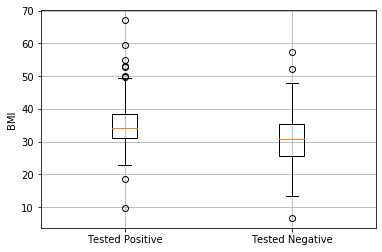

In [14]:
positive_glucose = preprocDf[preprocDf["Outcome"]==1]["BMI"]
negative_glucose = preprocDf[preprocDf["Outcome"]==0]["BMI"]

plt.boxplot([positive_glucose, negative_glucose])
plt.xticks([1,2],('Tested Positive','Tested Negative'))
plt.ylabel('BMI')
plt.grid()
plt.show()

#### Observations :

1. More than 75 percent of patients with diabetes had BMI greater than 30
<br><br>
2. 50 percent of patients without diabetes had BMI less than 30
<br><br>
3. BMI can be a major feature to decide whethere a patient is diabetic
<br><br>
4. Patient with BMI greater than 30 has higher chances of having diabetes

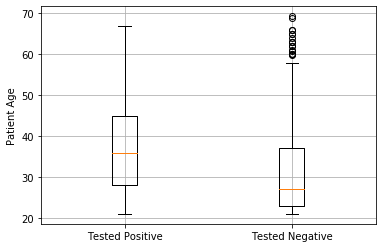

In [15]:
positive_glucose = preprocDf[preprocDf["Outcome"]==1]["Age"]
negative_glucose = preprocDf[preprocDf["Outcome"]==0]["Age"]

plt.boxplot([positive_glucose, negative_glucose])
plt.xticks([1,2],('Tested Positive','Tested Negative'))
plt.ylabel("Patient Age")
plt.grid()
plt.show()

#### Observations :

1. More than 75 percent of patients tested negative had age less than 38
<br><br>
2. More than 50 percent of patients with diabetes were of age greater than 35
<br><br>
3. Patient with age greater than 35 years have chances of having diabetes
<br><br>
4. Age can be considered as one of the major feature for classification

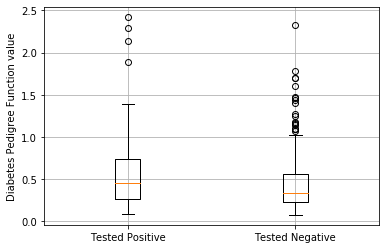

In [16]:
positive_glucose = preprocDf[preprocDf["Outcome"]==1]["DiabetesPedigreeFunction"]
negative_glucose = preprocDf[preprocDf["Outcome"]==0]["DiabetesPedigreeFunction"]

plt.boxplot([positive_glucose, negative_glucose])
plt.xticks([1,2],('Tested Positive','Tested Negative'))
plt.ylabel('Diabetes Pedigree Function value')
plt.grid()
plt.show()

#### Observations :

1. More than 50 percent of patient with Pedigree function value greater than 0.4 had diabetes
<br><br>
2. Among the patients tested negative for diabetes 50 percent of them had diabetes pedigree function vaue less than 0.3
<br><br>
3. If the diabetes pedigree function value is greater than 0.5 it is highly likely to have diabetes

## Model Building

1. Features taken into cosideration    ["Pregnancies","Glucose","BloodPressure","BMI","DiabetesPedigreeFunction","Age"]
<br><br>
2. Since it's a classification problem logistic regression and knn algorithms are used to train the model.
<br><br>
3. The given data is split into train and test in the ratio 8:2. 
<br><br>
3. PCA can be used to reduce the dimension from 6 features to 2 main features. Accuracy of model will be evaluated with and without dimensionality reduction.
<br><br>

In [17]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

# Features that are considered for analysis

features = ["Pregnancies","Glucose","BloodPressure","BMI","DiabetesPedigreeFunction","Age"]

outcomeDf = preprocDf.loc[:,"Outcome"]
featuresDf = preprocDf.loc[:,features]

featuresDf.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,33.600000,0.627,50.0
1,1.0,85.0,66.0,26.600000,0.351,31.0
2,8.0,183.0,64.0,23.300000,0.672,32.0
3,1.0,89.0,66.0,19.179925,0.167,21.0
4,0.0,137.0,40.0,43.100000,2.288,33.0


#### Dimensionality Reduction using PCA

In [18]:
# PCA is used to reduce the dimension to 2
# Here the two most prominent feature are considered (Number of components)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = preprocDf.loc[:,features].values
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pcaDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


print(pcaDf.shape)
print(preprocDf["Outcome"].shape)
pcaDf.head()

(676, 2)
(676,)


,principal component 1,principal component 2
0,-1.525006,-0.192048
1,1.459748,-0.591650
2,-0.670855,-0.470986
3,2.251888,-1.142887
4,0.464882,3.938238


In [19]:
# Concat the outcome column with two principal components

pcaDf.reset_index(drop=True, inplace=True)
preprocDf.reset_index(drop=True, inplace=True)

pcafinalDf = pd.concat([pcaDf,preprocDf[["Outcome"]]],axis=1)
pcafinalDf.shape

(676, 3)

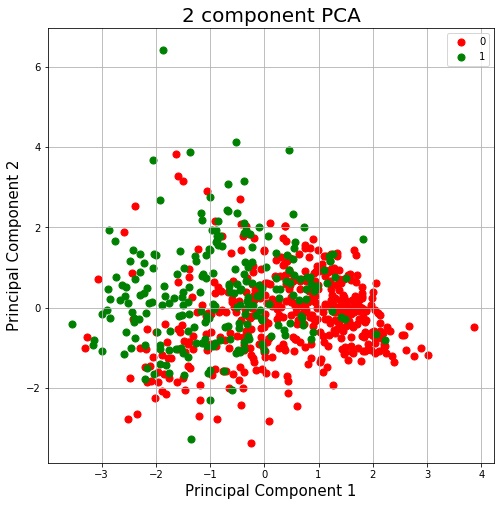

In [20]:
# Plot the datapoints considering principal component 1 and principal component2

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    req_row = pcafinalDf['Outcome'] == target
    ax.scatter(pcafinalDf.loc[req_row, 'principal component 1']
               , pcafinalDf.loc[req_row, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Spliting dataset into train and test

In [21]:
# Preprocessed data is split into train and test in the ratio 8:2

featuresDf_train,featuresDf_test,outcomeDf_train,outcomeDf_test,pcaDf_train,pcaDf_test = train_test_split(featuresDf,outcomeDf,pcaDf,test_size=0.2,random_state=4)

featuresDf_test.shape

(136, 6)

### Using Logistic Regression

#### Logistic regression without dimensionality reduction(without PCA)

In [22]:
# Building a logistic regression model for the train data

model = linear_model.LogisticRegression()
model.fit(featuresDf_train,outcomeDf_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Test data is given as input for model to predict the outcome

outcomeDf_pred = model.predict(featuresDf_test)


In [24]:
# Accuracy is computed by taking the test outcome as reference

print("Accuracy of Logistic Regression without pca : ",metrics.accuracy_score(outcomeDf_test,outcomeDf_pred)*100)

Accuracy of Logistic Regression without pca :  80.14705882352942


In [25]:
confusion = metrics.confusion_matrix(outcomeDf_test,outcomeDf_pred)

print("For class 0:\n")
print("Data points predicted as 0 = ",confusion[0,0])
print("Data points predicted as 1 = ",confusion[0,1])

print("\nFor class 1:\n")
print("Data points predicted as 0 = ",confusion[1,0])
print("Data points predicted as 1 = ",confusion[1,1])


For class 0:

Data points predicted as 0 =  86
Data points predicted as 1 =  4

For class 1:

Data points predicted as 0 =  23
Data points predicted as 1 =  23


#### Logistic regression with dimensionality reduction(PCA)

In [26]:
model = linear_model.LogisticRegression()
model.fit(pcaDf_train,outcomeDf_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
pcaoutDf_pred = model.predict(pcaDf_test)
print("Accuracy of Logistic Regression with pca : ",metrics.accuracy_score(outcomeDf_test,pcaoutDf_pred)*100)

Accuracy of Logistic Regression with pca :  75.0


In [28]:
confusion = metrics.confusion_matrix(outcomeDf_test,pcaoutDf_pred)

print("For class 0:\n")
print("Data points predicted as 0 = ",confusion[0,0])
print("Data points predicted as 1 = ",confusion[0,1])

print("\nFor class 1:\n")
print("Data points predicted as 0 = ",confusion[1,0])
print("Data points predicted as 1 = ",confusion[1,1])

For class 0:

Data points predicted as 0 =  86
Data points predicted as 1 =  4

For class 1:

Data points predicted as 0 =  30
Data points predicted as 1 =  16


### Using K-Nearest Neighbour

1. From the scatter plot(Principal component 1 vs principal component 2) it can be inferred that two classes are not linearly separable.
<br><br>
2. Logistic regression might be failing to fit a accurate plane that can separate the two classes with more accuracy.
<br><br>
3. K-NN algorithm finds k-nearest neigbours for a data point and decides it's class based on majotity rule. 
<br><br>
4. Best values of k can be chosen by a technique called cross validation(10 fold). Here the train data is split into 10 parts. In each interval one part among 10 is chosen as test and knn is applied on that. Mean of accuracy is calculated for all 10 parts(cv_scores). This is repeated for different values of k. k value that gives best accuracy is chosen as optimal k value.
<br><br>
5. Model is designed for dataset with and without pca and accuracy is tested for both cases.

#### K-NN without dimensionality reduction(without PCA) :

Choosing optimal value of k

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import neighbors

# Here cv_score is calculated for k values from 1 to 50

possible_k_values = list(range(1,50))

cv_scores = []

# 10-fold cross validation

for k in possible_k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, featuresDf_train,outcomeDf_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# choosing the optimal k that has more cv score     
    
optimal_k = possible_k_values[cv_scores.index(max(cv_scores))]

print('\nThe optimal value of k(neighbours) = %d.' % optimal_k)



The optimal value of k(neighbours) = 33.


In [30]:

knnModel = neighbors.KNeighborsClassifier(optimal_k)
knnModel.fit(featuresDf_train,outcomeDf_train)
knnOutcome_pred = knnModel.predict(featuresDf_test)
print("Accuracy of knn without pca : %f" % (metrics.accuracy_score(outcomeDf_test,knnOutcome_pred)*100))


Accuracy of knn without pca : 83.088235


In [31]:
confusion = metrics.confusion_matrix(outcomeDf_test,knnOutcome_pred)

print("For class 0:\n")
print("Data points predicted as 0 = ",confusion[0,0])
print("Data points predicted as 1 = ",confusion[0,1])

print("\nFor class 1:\n")
print("Data points predicted as 0 = ",confusion[1,0])
print("Data points predicted as 1 = ",confusion[1,1])

For class 0:

Data points predicted as 0 =  88
Data points predicted as 1 =  2

For class 1:

Data points predicted as 0 =  21
Data points predicted as 1 =  25


#### K-NN with dimensionality reduction(with PCA)

Choosing optimal value of k

In [32]:

# Here cv_score is calculated for k values from 1 to 50

possible_k_values = list(range(1,50))

cv_scores = []

# 10-fold cross validation

for k in possible_k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, pcaDf_train,outcomeDf_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# choosing the optimal k that has more cv score     
    
optimal_k = possible_k_values[cv_scores.index(max(cv_scores))]

print('\nThe optimal value of k(neighbours) = %d.' % optimal_k)



The optimal value of k(neighbours) = 41.


In [33]:

knnModel = neighbors.KNeighborsClassifier(optimal_k)
knnModel.fit(pcaDf_train,outcomeDf_train)
knnOutcome_pred = knnModel.predict(pcaDf_test)

In [34]:
print("Accuracy of knn with pca: ",metrics.accuracy_score(outcomeDf_test,knnOutcome_pred)*100)

Accuracy of knn with pca:  75.73529411764706


In [35]:
confusion = metrics.confusion_matrix(outcomeDf_test,knnOutcome_pred)

print("For class 0:\n")
print("Data points predicted as 0 = ",confusion[0,0])
print("Data points predicted as 1 = ",confusion[0,1])

print("\nFor class 1:\n")
print("Data points predicted as 0 = ",confusion[1,0])
print("Data points predicted as 1 = ",confusion[1,1])

For class 0:

Data points predicted as 0 =  86
Data points predicted as 1 =  4

For class 1:

Data points predicted as 0 =  29
Data points predicted as 1 =  17


## Conclusion :

1. Data preprocession was done to replace the missing values with appropriate ones. The rows containing invalid inputs(like zero values) for certain columns were eliminated.
<br><br>
2. Exploratoty data analysis was made to get insight about the distribution of the data with respect to different  features. Probability density function and Box plot tools were used for analysis.
<br><br>
3. PCA was used for dimensionality reduction and principal components were plotted using 2d-scatter plot. 
<br><br>
4. Model was trained using Logistic regression. Model was trained with and without dimensionality reduction.Accuracy was ranging between 72% to 80%.
<br><br>
4. Model was trained using K-NN. Optimal value for k was chosen using cross validation technique. Model was trained with and without dimensionality reduction.Accuracy was ranging between 72% to 80%.
